# Exploratory Data Analysis & Intro

## Goal

1. Investigate top-paying roles and skills in the data science industry.
2. Use Python to explore a real-life dataset on job postings.
3. For job-seekers: use these insights to help find the best job opportunities.

## Final Deliverables:

- Create Jupyter Notebooks (showcasing core skills in Python)
- Create a summary page (via [README.md](README.md)) captivating your findings.
- Share this project via GitHub & LinkedIn.

## Questions to Answer

1. What are the most demanded skills for the top 3 most popular data roles?
2. How are in-demand skills trending for Data Analysts?
3. How well do jobs and skills pay for Data Analysts?
4. What is the most optimal skill to learn for Data Analysts? (High Demand AND High Paying)

I'll be focusing on Hungarian Data Analyst roles.

### Importing Libraries and Data

In [4]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

### Roles to focus on

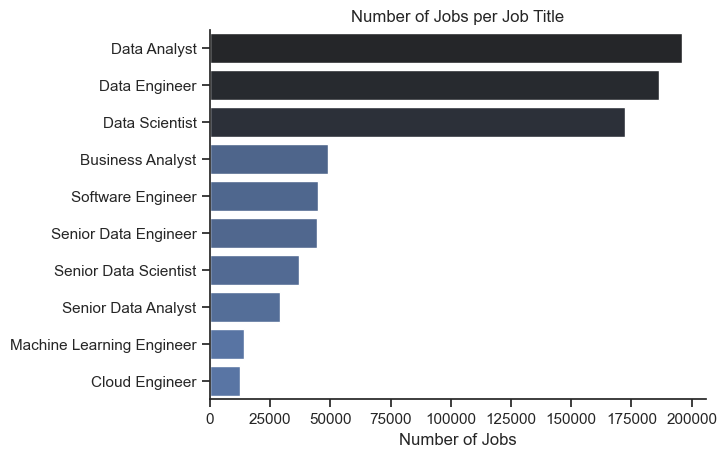

In [111]:
df_plot = df['job_title_short'].value_counts().to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_title_short', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Job Title')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Countries to focus on

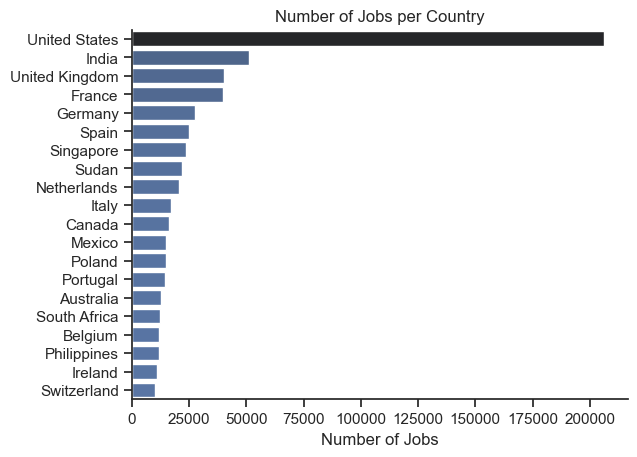

In [112]:
df_plot = df['job_country'].value_counts().to_frame().head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_country', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Country')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Companies to focus on

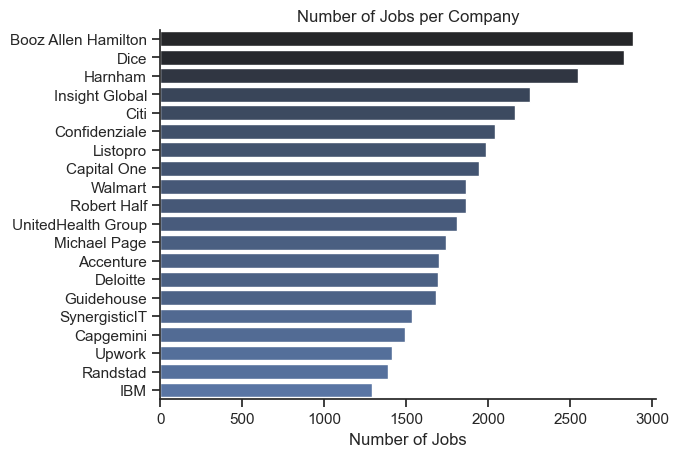

In [113]:
df_plot = df['company_name'].value_counts().to_frame()[1:].head(20)

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title('Number of Jobs per Company')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

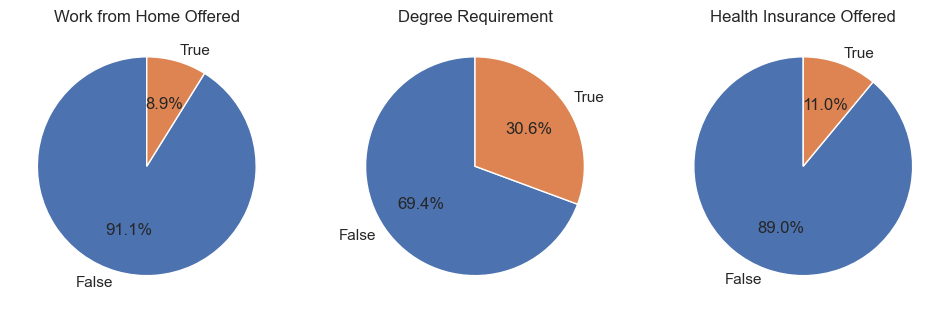

In [114]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3, figsize=(12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.show()

### Explore the Role and Country of our choice

In [115]:
# Setting what role and which country to explore
role = 'Data Analyst'
country = 'Hungary'

In [116]:
# Filtering the DataFrame for the role and country
df_role = df[(df['job_country'] == country) & (df['job_title_short'] == role)]

### Locations to focus on

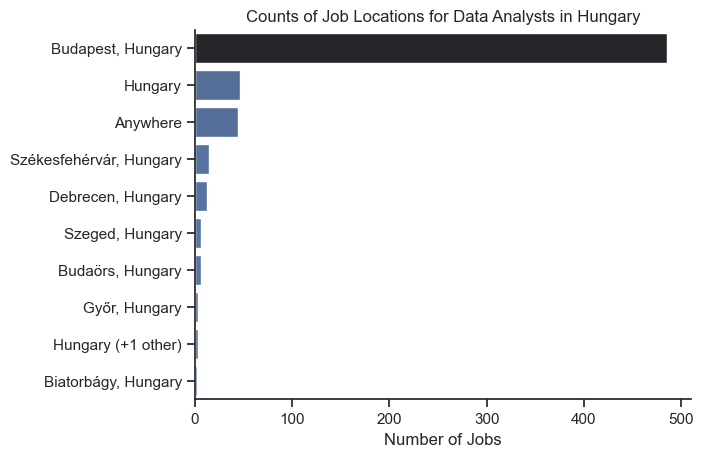

In [117]:
df_plot = df_role['job_location'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='job_location', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'Counts of Job Locations for {role}s in {country}')
plt.xlabel('Number of Jobs')
plt.ylabel('')
plt.show()

### Job Opportunities

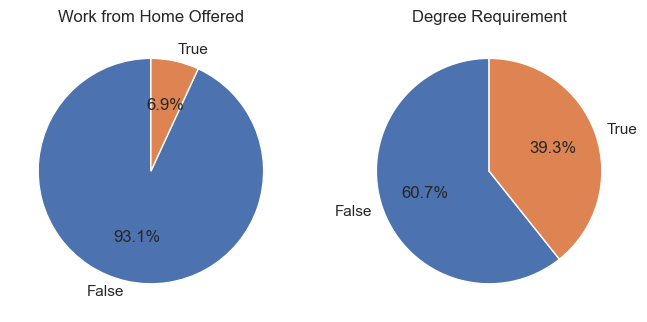

In [118]:
dict_all = {
        'job_work_from_home': 'Work from Home Offered',
        'job_no_degree_mention': 'Degree Requirement',
        'job_health_insurance': 'Health Insurance Offers'
    }

# Show only charts that have both True and False values
dict_column = {}
for key, value in dict_all.items():
    if len(df_role[key].value_counts().tolist()) == 2:
        dict_column[key] = value

fig_width = len(dict_column) * 4
fig, ax = plt.subplots(1, len(dict_column), figsize=(fig_width, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_role[column].value_counts(), startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

### Companies to Explore

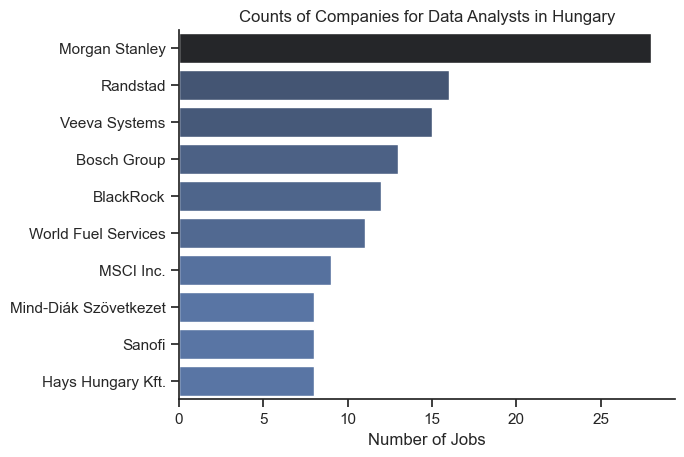

In [119]:
df_plot = df_role['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x='count', y='company_name', hue='count', palette='dark:b_r', legend=False)
sns.despine()
plt.title(f'Counts of Companies for {role}s in {country}')
plt.xlabel('Number of Jobs')
plt.ylabel('')

plt.show()